In [42]:
import pandas as pd
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.inter_rater as irr

In [43]:
df = pd.read_csv('labelling_comparison_dataset.csv')
display(df.head(10))
print(df.columns)

,Unnamed: 0.1,Unnamed: 0,verdict,statement_originator,statement_x,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link,...,Offensive Assessment,statement_y,Toxicity_GPT4_without_NV,Fact assessment_GPT4_without_NV,statement_z,Toxicity_GPT4_with_NV,Fact assessment_GPT4_with_NV,statement_w,Toxicity_GPT3_without_NV,Fact assessment_GPT3_without_NV
0,0,5343,true,Norcross City Council,The proposed raises for the Norcross City Coun...,5/9/2013,news,Eric Stirgus,5/28/2013,https://www.politifact.com/factchecks/2013/may...,...,NaN,The proposed raises for the Norcross City Coun...,1.0,Unverifiable,The proposed raises for the Norcross City Coun...,1.0,No verdict,The proposed raises for the Norcross City Coun...,1.0,true
1,1,19939,false,Donald Trump,"Says 99% of COVID-19 cases ""are totally harmle...",7/4/2020,speech,Jon Greenberg,7/6/2020,https://www.politifact.com/factchecks/2020/jul...,...,NaN,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,False,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,False,"Says 99% of COVID-19 cases ""are totally harmle...",3.0,False
2,2,8688,half-true,Mark Kelly,"Says Martha McSally ""voted to take away money ...",10/6/2020,speech,Miriam Valverde,10/14/2020,https://www.politifact.com/factchecks/2020/oct...,...,NaN,"Says Martha McSally ""voted to take away money ...",1.0,True,"Says Martha McSally ""voted to take away money ...",1.0,No verdict,"Says Martha McSally ""voted to take away money ...",2.0,false
3,3,1866,half-true,Beto O'Rourke,"El Paso is the ""safest city in the state of Te...",3/31/2017,campaign,W. Gardner Selby,4/14/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"El Paso is the ""safest city in the state of Te...",1.0,False,"El Paso is the ""safest city in the state of Te...",1.0,False,"El Paso is the ""safest city in the state of Te...",NaN,False
4,4,2729,false,Kimberley Strassel,"In 2008, ""candidate Obama, he's not even presi...",5/28/2017,news,Lauren Carroll,6/2/2017,https://www.politifact.com/factchecks/2017/jun...,...,NaN,"In 2008, ""candidate Obama, he's not even presi...",1.0,False,"In 2008, ""candidate Obama, he's not even presi...",1.0,False,"In 2008, ""candidate Obama, he's not even presi...",8.0,false
5,5,6934,pants-fire,Tom Letson,Says Gov. John Kasich implied that a portion o...,5/16/2013,email,Henry J. Gomez,6/7/2013,https://www.politifact.com/factchecks/2013/jun...,...,NaN,Says Gov. John Kasich implied that a portion o...,1.0,False,Says Gov. John Kasich implied that a portion o...,1.0,No verdict,Says Gov. John Kasich implied that a portion o...,3.0,False
6,6,10706,mostly-true,Ron Wyden,"""We had bipartisan legislation that got throug...",3/17/2009,news,Alexander Lane,3/18/2009,https://www.politifact.com/factchecks/2009/mar...,...,NaN,"""We had bipartisan legislation that got throug...",1.0,'false',"""We had bipartisan legislation that got throug...",1.0,no verdict,"""We had bipartisan legislation that got throug...",2.0,true
7,7,20329,pants-fire,Michele Bachmann,ACORN will be a paid partner with the Census B...,6/17/2009,news,Robert Farley,6/26/2009,https://www.politifact.com/factchecks/2009/jun...,...,NaN,ACORN will be a paid partner with the Census B...,1.0,false,ACORN will be a paid partner with the Census B...,1.0,False,ACORN will be a paid partner with the Census B...,2.0,false
8,8,18147,false,Donald Trump,"""The weak illegal immigration policies of the ...",4/18/2017,social_media,Amy Sherman,4/18/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"""The weak illegal immigration policies of the ...",4.0,False,"""The weak illegal immigration policies of the ...",3.0,false,"""The weak illegal immigration policies of the ...",3.0,False
9,9,13149,half-true,Sheri Dillon,"""Paying for a hotel room is not a gift or a pr...",1/11/2017,news,Lauren Carroll,1/13/2017,https://www.politifact.com/factchecks/2017/jan...,...,NaN,"""Paying for a hotel room is not a gift or a pr...",1.0,True,"""Paying for a hotel room i

Index(['Unnamed: 0.1', 'Unnamed: 0', 'verdict', 'statement_originator',
       'statement_x', 'statement_date', 'statement_source', 'factchecker',
       'factcheck_date', 'factcheck_analysis_link', 'Toxicity_GPT3_wNV',
       'Fact_assessment_GPT3_wNV', 'Offensive Assessment', 'statement_y',
       'Toxicity_GPT4_without_NV', 'Fact assessment_GPT4_without_NV',
       'statement_z', 'Toxicity_GPT4_with_NV', 'Fact assessment_GPT4_with_NV',
       'statement_w', 'Toxicity_GPT3_without_NV',
       'Fact assessment_GPT3_without_NV'],
      dtype='object')


In [44]:

label_mapping = {
    'no verdict': 'no verdict',
    "'no verdict'": 'no verdict',
    "'true'": 'true',
    "'false'": 'false',
    'FALSE': 'false',
    'False': 'false',
    'TRUE': 'true',
    'No verdict': 'no verdict',
    "No verdict": 'no verdict',
    'No verdict': 'no verdict',
    "'No verdict'": 'no verdict',
    "TRUE": 'true',
    "FALSE": 'false',
    "False.": 'false',
    "'false'.": 'false',
    "True": 'true',
    "'False'": 'false',
    "'True'": 'true',
    "'without evidence'":'',
    "'no verdict'.":'no verdict',
    'Unverifiable':'',
    'Cannot be assessed':'',
    '':'',
    'unknown': '',
    'unverifiable': '',
    'unverified': '',
    "'unknown'": '',
    "'unverifiable'": '',
    "'unverified'": '',
    'Mixed': '',
    'Not checkable': '',
    'Not checked': '',
    'Not enough information': '',
    'Not provided': '',
    'Requires context': '',
    'Requires fact-checking': '',
    'Subjective': '',
    'This cannot be determined without current data.': '',
    'This statement cannot be fact-checked without specific data.': '',
    'Unclear': '',
    'Undetermined': '',
    'Unverified': '',

}

# applying the mapping dictionary to standardize labels in both datasets
df['Fact_assessment_GPT3_wNV'] = df['Fact_assessment_GPT3_wNV'].map(label_mapping).fillna(df['Fact_assessment_GPT3_wNV'])
df['Fact assessment_GPT4_without_NV'] = df['Fact assessment_GPT4_without_NV'].map(label_mapping).fillna(df['Fact assessment_GPT4_without_NV'])
df['Fact assessment_GPT4_with_NV'] = df['Fact assessment_GPT4_with_NV'].map(label_mapping).fillna(df['Fact assessment_GPT4_with_NV'])
df['Fact assessment_GPT3_without_NV'] = df['Fact assessment_GPT3_without_NV'].map(label_mapping).fillna(df['Fact assessment_GPT3_without_NV'])



In [45]:
display(df.head(15))


,Unnamed: 0.1,Unnamed: 0,verdict,statement_originator,statement_x,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link,...,Offensive Assessment,statement_y,Toxicity_GPT4_without_NV,Fact assessment_GPT4_without_NV,statement_z,Toxicity_GPT4_with_NV,Fact assessment_GPT4_with_NV,statement_w,Toxicity_GPT3_without_NV,Fact assessment_GPT3_without_NV
0,0,5343,true,Norcross City Council,The proposed raises for the Norcross City Coun...,5/9/2013,news,Eric Stirgus,5/28/2013,https://www.politifact.com/factchecks/2013/may...,...,NaN,The proposed raises for the Norcross City Coun...,1.0,,The proposed raises for the Norcross City Coun...,1.0,no verdict,The proposed raises for the Norcross City Coun...,1.0,true
1,1,19939,false,Donald Trump,"Says 99% of COVID-19 cases ""are totally harmle...",7/4/2020,speech,Jon Greenberg,7/6/2020,https://www.politifact.com/factchecks/2020/jul...,...,NaN,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,false,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,false,"Says 99% of COVID-19 cases ""are totally harmle...",3.0,false
2,2,8688,half-true,Mark Kelly,"Says Martha McSally ""voted to take away money ...",10/6/2020,speech,Miriam Valverde,10/14/2020,https://www.politifact.com/factchecks/2020/oct...,...,NaN,"Says Martha McSally ""voted to take away money ...",1.0,true,"Says Martha McSally ""voted to take away money ...",1.0,no verdict,"Says Martha McSally ""voted to take away money ...",2.0,false
3,3,1866,half-true,Beto O'Rourke,"El Paso is the ""safest city in the state of Te...",3/31/2017,campaign,W. Gardner Selby,4/14/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"El Paso is the ""safest city in the state of Te...",1.0,false,"El Paso is the ""safest city in the state of Te...",1.0,false,"El Paso is the ""safest city in the state of Te...",NaN,false
4,4,2729,false,Kimberley Strassel,"In 2008, ""candidate Obama, he's not even presi...",5/28/2017,news,Lauren Carroll,6/2/2017,https://www.politifact.com/factchecks/2017/jun...,...,NaN,"In 2008, ""candidate Obama, he's not even presi...",1.0,false,"In 2008, ""candidate Obama, he's not even presi...",1.0,false,"In 2008, ""candidate Obama, he's not even presi...",8.0,false
5,5,6934,pants-fire,Tom Letson,Says Gov. John Kasich implied that a portion o...,5/16/2013,email,Henry J. Gomez,6/7/2013,https://www.politifact.com/factchecks/2013/jun...,...,NaN,Says Gov. John Kasich implied that a portion o...,1.0,false,Says Gov. John Kasich implied that a portion o...,1.0,no verdict,Says Gov. John Kasich implied that a portion o...,3.0,false
6,6,10706,mostly-true,Ron Wyden,"""We had bipartisan legislation that got throug...",3/17/2009,news,Alexander Lane,3/18/2009,https://www.politifact.com/factchecks/2009/mar...,...,NaN,"""We had bipartisan legislation that got throug...",1.0,false,"""We had bipartisan legislation that got throug...",1.0,no verdict,"""We had bipartisan legislation that got throug...",2.0,true
7,7,20329,pants-fire,Michele Bachmann,ACORN will be a paid partner with the Census B...,6/17/2009,news,Robert Farley,6/26/2009,https://www.politifact.com/factchecks/2009/jun...,...,NaN,ACORN will be a paid partner with the Census B...,1.0,false,ACORN will be a paid partner with the Census B...,1.0,false,ACORN will be a paid partner with the Census B...,2.0,false
8,8,18147,false,Donald Trump,"""The weak illegal immigration policies of the ...",4/18/2017,social_media,Amy Sherman,4/18/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"""The weak illegal immigration policies of the ...",4.0,false,"""The weak illegal immigration policies of the ...",3.0,false,"""The weak illegal immigration policies of the ...",3.0,false
9,9,13149,half-true,Sheri Dillon,"""Paying for a hotel room is not a gift or a pr...",1/11/2017,news,Lauren Carroll,1/13/2017,https://www.politifact.com/factchecks/2017/jan...,...,NaN,"""Paying for a hotel room is not a gift or a pr...",1.0,true,"""Paying for a hotel room is not a gift o

# Ground truth labels

In [46]:
ground_truth_mapping = {
    'mostly-true': 'true', 
    'ture': 'true',
    'half-true':'true',
    'mostly-false': 'false',
    'pants-fire':'false'}


df['verdict'] = df['verdict'].map(ground_truth_mapping).fillna(df['verdict'])

display(df.head(10))

,Unnamed: 0.1,Unnamed: 0,verdict,statement_originator,statement_x,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link,...,Offensive Assessment,statement_y,Toxicity_GPT4_without_NV,Fact assessment_GPT4_without_NV,statement_z,Toxicity_GPT4_with_NV,Fact assessment_GPT4_with_NV,statement_w,Toxicity_GPT3_without_NV,Fact assessment_GPT3_without_NV
0,0,5343,true,Norcross City Council,The proposed raises for the Norcross City Coun...,5/9/2013,news,Eric Stirgus,5/28/2013,https://www.politifact.com/factchecks/2013/may...,...,NaN,The proposed raises for the Norcross City Coun...,1.0,,The proposed raises for the Norcross City Coun...,1.0,no verdict,The proposed raises for the Norcross City Coun...,1.0,true
1,1,19939,false,Donald Trump,"Says 99% of COVID-19 cases ""are totally harmle...",7/4/2020,speech,Jon Greenberg,7/6/2020,https://www.politifact.com/factchecks/2020/jul...,...,NaN,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,false,"Says 99% of COVID-19 cases ""are totally harmle...",1.0,false,"Says 99% of COVID-19 cases ""are totally harmle...",3.0,false
2,2,8688,true,Mark Kelly,"Says Martha McSally ""voted to take away money ...",10/6/2020,speech,Miriam Valverde,10/14/2020,https://www.politifact.com/factchecks/2020/oct...,...,NaN,"Says Martha McSally ""voted to take away money ...",1.0,true,"Says Martha McSally ""voted to take away money ...",1.0,no verdict,"Says Martha McSally ""voted to take away money ...",2.0,false
3,3,1866,true,Beto O'Rourke,"El Paso is the ""safest city in the state of Te...",3/31/2017,campaign,W. Gardner Selby,4/14/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"El Paso is the ""safest city in the state of Te...",1.0,false,"El Paso is the ""safest city in the state of Te...",1.0,false,"El Paso is the ""safest city in the state of Te...",NaN,false
4,4,2729,false,Kimberley Strassel,"In 2008, ""candidate Obama, he's not even presi...",5/28/2017,news,Lauren Carroll,6/2/2017,https://www.politifact.com/factchecks/2017/jun...,...,NaN,"In 2008, ""candidate Obama, he's not even presi...",1.0,false,"In 2008, ""candidate Obama, he's not even presi...",1.0,false,"In 2008, ""candidate Obama, he's not even presi...",8.0,false
5,5,6934,false,Tom Letson,Says Gov. John Kasich implied that a portion o...,5/16/2013,email,Henry J. Gomez,6/7/2013,https://www.politifact.com/factchecks/2013/jun...,...,NaN,Says Gov. John Kasich implied that a portion o...,1.0,false,Says Gov. John Kasich implied that a portion o...,1.0,no verdict,Says Gov. John Kasich implied that a portion o...,3.0,false
6,6,10706,true,Ron Wyden,"""We had bipartisan legislation that got throug...",3/17/2009,news,Alexander Lane,3/18/2009,https://www.politifact.com/factchecks/2009/mar...,...,NaN,"""We had bipartisan legislation that got throug...",1.0,false,"""We had bipartisan legislation that got throug...",1.0,no verdict,"""We had bipartisan legislation that got throug...",2.0,true
7,7,20329,false,Michele Bachmann,ACORN will be a paid partner with the Census B...,6/17/2009,news,Robert Farley,6/26/2009,https://www.politifact.com/factchecks/2009/jun...,...,NaN,ACORN will be a paid partner with the Census B...,1.0,false,ACORN will be a paid partner with the Census B...,1.0,false,ACORN will be a paid partner with the Census B...,2.0,false
8,8,18147,false,Donald Trump,"""The weak illegal immigration policies of the ...",4/18/2017,social_media,Amy Sherman,4/18/2017,https://www.politifact.com/factchecks/2017/apr...,...,NaN,"""The weak illegal immigration policies of the ...",4.0,false,"""The weak illegal immigration policies of the ...",3.0,false,"""The weak illegal immigration policies of the ...",3.0,false
9,9,13149,true,Sheri Dillon,"""Paying for a hotel room is not a gift or a pr...",1/11/2017,news,Lauren Carroll,1/13/2017,https://www.politifact.com/factchecks/2017/jan...,...,NaN,"""Paying for a hotel room is not a gift or a pr...",1.0,true,"""Paying for a hotel room is not a gift or a pr...",1.0,no verdict,"""Pay

Fact assessment_GPT3_without_NV,,false,true
verdict,,,
false,0,353,199
true,1,134,313


Fact assessment_GPT3_without_NV,,false,true
verdict,,,
false,0.000000,0.639493,0.360507
true,0.002232,0.299107,0.698661


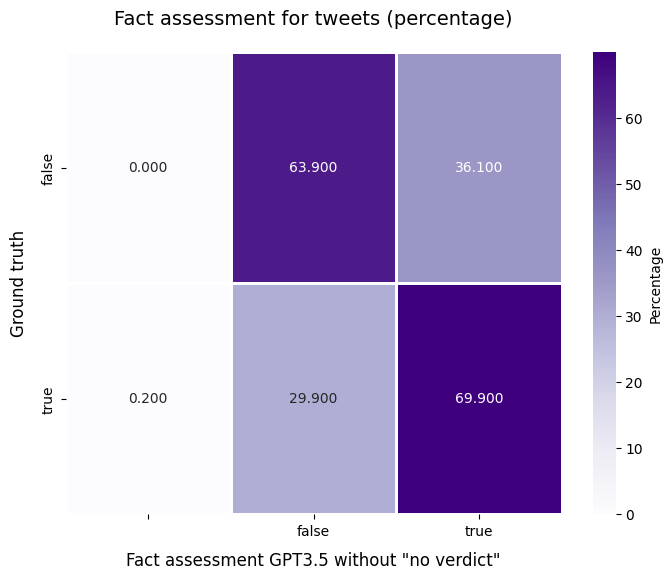

In [47]:
table = pd.crosstab(df['verdict'], df['Fact assessment_GPT3_without_NV'])
display(table)


row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT3.5 without "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Ground truth', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

In [48]:

# dropping rows with NaN values in the relevant columns
df_kappa = df.dropna(subset=['verdict', 'Fact assessment_GPT3_without_NV'])

# extracting the relevant columns
rater1 = df_kappa['verdict']
rater2 = df_kappa['Fact assessment_GPT3_without_NV']


# calculating Cohen's kappa
kappa = cohen_kappa_score(rater1, rater2)

print(f"Cohen's kappa of PolitiFact label and GPT3.5 label without 'no verdict': {kappa}")



Cohen's kappa of PolitiFact label and GPT3.5 label without 'no verdict': 0.3343961737744121


Fact_assessment_GPT3_wNV,false,no verdict,true
verdict,,,
false,327,101,124
true,111,79,258


Fact_assessment_GPT3_wNV,false,no verdict,true
verdict,,,
false,0.592391,0.182971,0.224638
true,0.247768,0.176339,0.575893


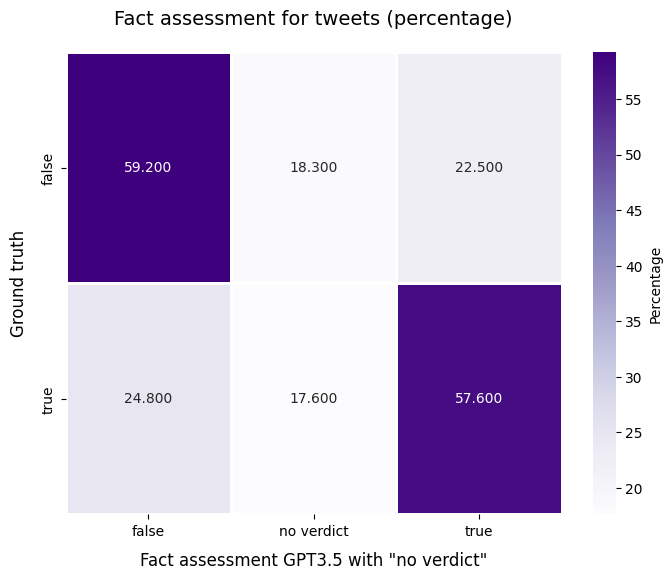

In [49]:
table = pd.crosstab(df['verdict'], df['Fact_assessment_GPT3_wNV'])
display(table)
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT3.5 with "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Ground truth', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

In [50]:

# dropping rows with NaN values in the relevant columns
df_kappa = df.dropna(subset=['verdict', 'Fact_assessment_GPT3_wNV'])


# extracting the relevant columns
rater1 = df_kappa['verdict']
rater2 = df_kappa['Fact_assessment_GPT3_wNV']


# calculating Cohen's kappa
kappa = cohen_kappa_score(rater1, rater2)

print(f"Cohen's kappa of PolitiFact label and GPT3.5 label with'no verdict': {kappa}")


Cohen's kappa of PolitiFact label and GPT3.5 label with'no verdict': 0.2931213037909137


Fact assessment_GPT4_without_NV,,false,true
verdict,,,
false,61,434,56
true,77,184,186


Fact assessment_GPT4_without_NV,,false,true
verdict,,,
false,0.110708,0.787659,0.101633
true,0.172260,0.411633,0.416107


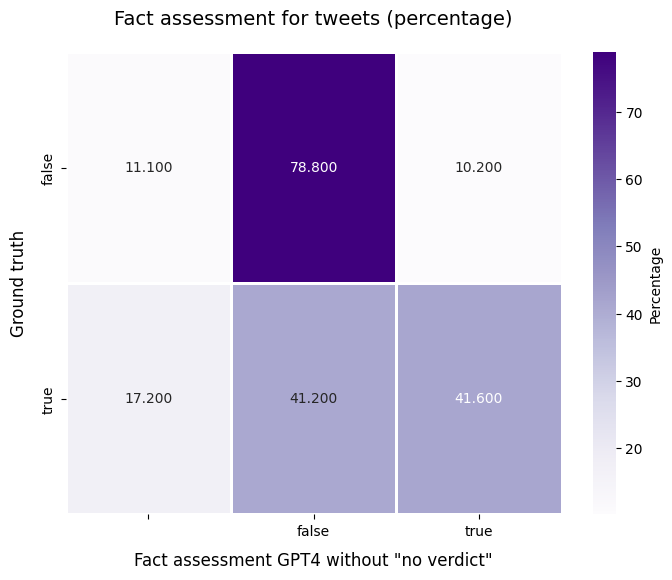

In [51]:
table = pd.crosstab(df['verdict'], df['Fact assessment_GPT4_without_NV'])
display(table)
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT4 without "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Ground truth', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

In [52]:

# dropping rows with NaN values in the relevant columns
df_kappa = df.dropna(subset=['verdict', 'Fact assessment_GPT4_without_NV'])


# extracting the relevant columns
rater1 = df_kappa['verdict']
rater2 = df_kappa['Fact assessment_GPT4_without_NV']


# calculating Cohen's kappa
kappa = cohen_kappa_score(rater1, rater2)

print(f"Cohen's kappa of PolitiFact label and GPT4 label without 'no verdict': {kappa}")

Cohen's kappa of PolitiFact label and GPT4 label without 'no verdict': 0.31073318326658295


Fact assessment_GPT4_with_NV,false,no verdict,true
verdict,,,
false,260,278,14
true,52,323,73


Fact assessment_GPT4_with_NV,false,no verdict,true
verdict,,,
false,0.471014,0.503623,0.025362
true,0.116071,0.720982,0.162946


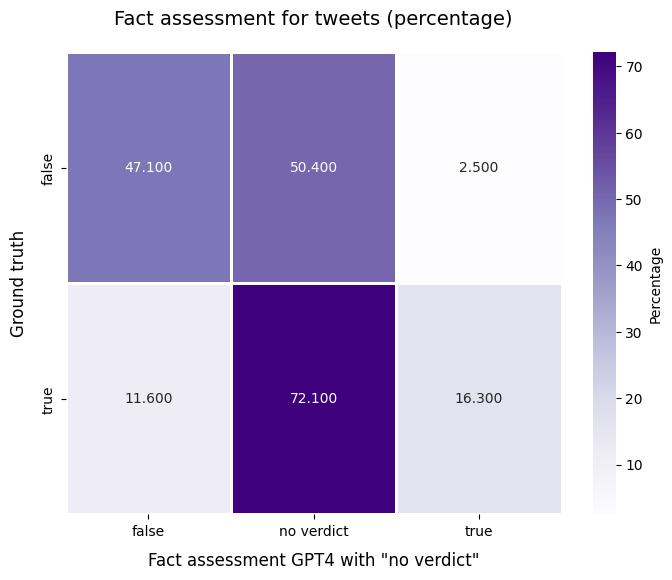

In [53]:
table = pd.crosstab(df['verdict'], df['Fact assessment_GPT4_with_NV'])
display(table)
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT4 with "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Ground truth', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

In [54]:

# dropping rows with NaN values in the relevant columns
df_kappa = df.dropna(subset=['verdict', 'Fact assessment_GPT4_with_NV'])


# extracting the relevant columns
rater1 = df_kappa['verdict']
rater2 = df_kappa['Fact assessment_GPT4_with_NV']


# calculating Cohen's kappa
kappa = cohen_kappa_score(rater1, rater2)

print(f"Cohen's kappa of PolitiFact label and GPT4 label with 'no verdict': {kappa}")



Cohen's kappa of PolitiFact label and GPT4 label with 'no verdict': 0.15441176470588236


In [55]:
table = pd.crosstab(df['Fact_assessment_GPT3_wNV'], df['Fact assessment_GPT3_without_NV'])
display(table)

Fact assessment_GPT3_without_NV,,false,true
Fact_assessment_GPT3_wNV,,,
false,0,370,68
no verdict,1,84,95
true,0,33,349


divide the rows by the row total - probability 

In [56]:
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

Fact assessment_GPT3_without_NV,,false,true
Fact_assessment_GPT3_wNV,,,
false,0.000000,0.844749,0.155251
no verdict,0.005556,0.466667,0.527778
true,0.000000,0.086387,0.913613


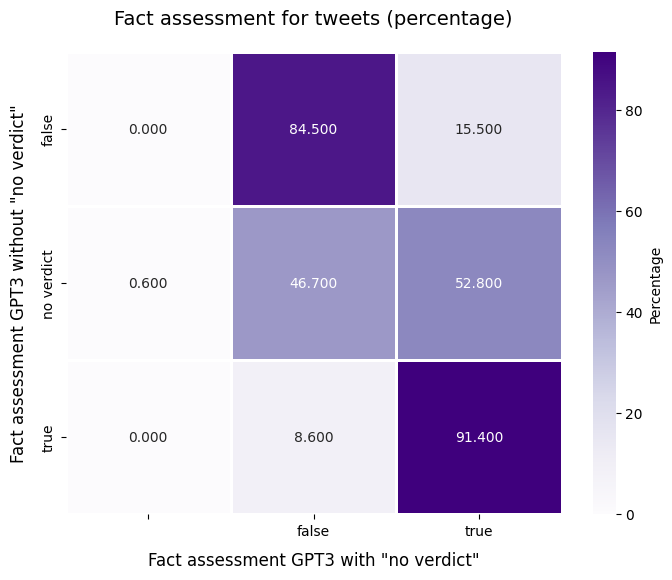

In [57]:

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT3 with "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Fact assessment GPT3 without "no verdict"', fontsize=12, labelpad=10)

# displaying the plot
plt.show()


In [58]:

kappa = cohen_kappa_score(df['Fact_assessment_GPT3_wNV'], df['Fact assessment_GPT3_without_NV'])

print(f"Cohen's kappa: {kappa:.3f}")


Cohen's kappa: 0.525


# GPT4

In [59]:
table = pd.crosstab(df['Fact assessment_GPT4_with_NV'], df['Fact assessment_GPT4_without_NV'])
display(table)
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)
print(table.columns)

Fact assessment_GPT4_without_NV,,false,true
Fact assessment_GPT4_with_NV,,,
false,0,302,10
no verdict,137,311,151
true,1,5,81


Fact assessment_GPT4_without_NV,,false,true
Fact assessment_GPT4_with_NV,,,
false,0.000000,0.967949,0.032051
no verdict,0.228715,0.519199,0.252087
true,0.011494,0.057471,0.931034


Index(['', 'false', 'true'], dtype='object', name='Fact assessment_GPT4_without_NV')


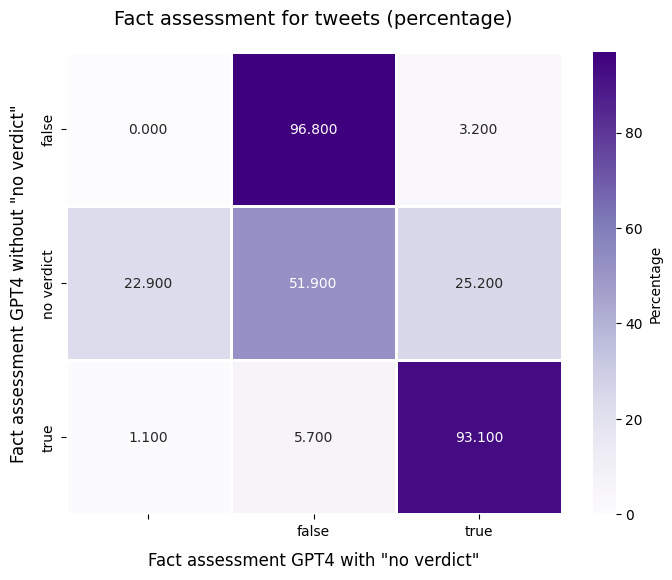

In [60]:

table_normalized = table_normalized.round(3) * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Purples", fmt=".3f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment GPT4 with "no verdict"', fontsize=12, labelpad=10)
plt.ylabel('Fact assessment GPT4 without "no verdict"', fontsize=12, labelpad=10)

# displaying the plot
plt.show()


Cohen's Kappa is a statistical measure used to quantify the level of agreement between two raters (or judges, observers, etc.) who each classify items into categories. It is 1.0 when there is perfect agreement between the raters.


In [61]:

# converting numerical labels to string labels
df['Toxicity_not_neutral'] = df['Toxicity_not_neutral'].astype(int)
#df['Toxicity'] = df['Toxicity'].astype(str)
df.dropna(subset=['Toxicity'], inplace=True)
df['Toxicity'] = df['Toxicity'].astype(int)


table_toxicity = pd.crosstab(df['Toxicity_not_neutral'], df['Toxicity'])
table_toxicity = table_toxicity.sort_index()
display(table_toxicity)


KeyError: 'Toxicity_not_neutral'

In [ ]:
row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
display(table_normalized_toxicity)

NameError: name 'table_toxicity' is not defined

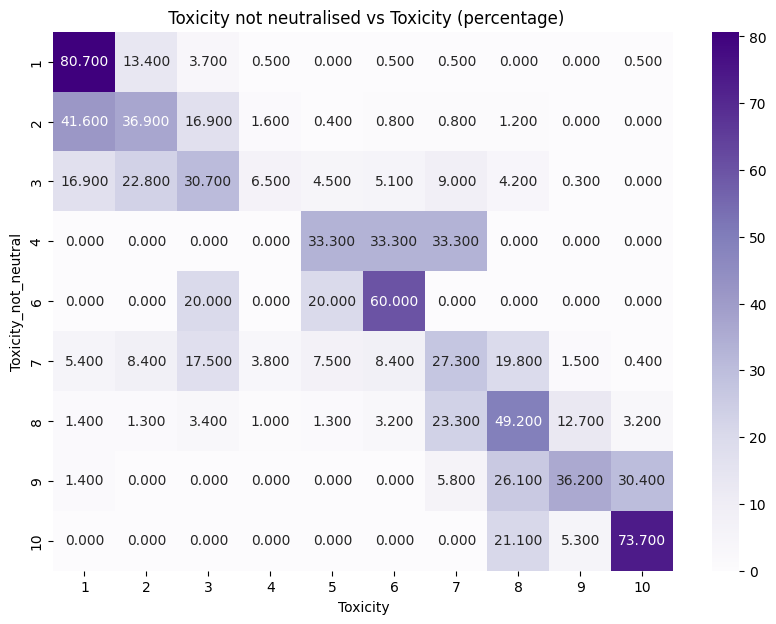

In [ ]:
# Plotting the heatmap
table_normalized_toxicity = table_normalized_toxicity.round(3) * 100
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Purples", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity (percentage)")
plt.show()

## Biden subset



In [ ]:
df_biden = df[df['Biden initially'] == 1]

display(df_biden)

,Unnamed: 0,created_at_fuzzy,state_likely_tweeted_from,text,source,display_text_width,lang,favorite_count,retweet_count,is_quote,...,listed_count,statuses_count,favourites_count,Biden initially,Trump initially,Toxicity_not_neutral,Fact_assessment_not_neutral,Toxicity,Fact assessment,topic_label
2,2,2020-10-26T23:16:05Z,New York,#NewHampshire #VoteBlue #VoteBlueToSaveAmerica...,Twitter Web App,267,en,7,4,False,...,52,304911,146137,1,0,2,true,1,true,1.0
3,3,2020-08-24T09:54:59Z,Florida,"@davidsirota I'm so confused, when is the medi...",Twitter for Android,262,en,2,0,False,...,5,16851,7429,1,0,7,no verdict,5,no verdict,-1.0
4,4,2021-02-04T11:31:07Z,Washington,@Carlos27480217 @DonaldJTrumpJr Yep! He has Ba...,Twitter for Android,88,en,0,0,False,...,0,2618,1517,1,0,8,false,8,no verdict,16.0
5,5,2021-01-03T11:54:56Z,Texas,@HouseGOP @SenateGOP @GOP @NRSC @NRCC It is in...,Twitter for iPhone,270,en,0,0,True,...,29,37936,31978,1,0,8,false,7,no verdict,-1.0
6,6,2020-09-03T03:39:01Z,Illinois,@dachs8 @JordanChariton Seriously? Almost ever...,Twitter for Android,278,en,6,0,False,...,6,7168,125089,1,0,7,no verdict,8,no verdict,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1986,2020-09-11T12:26:09Z,Florida,Hannity: Another blatant lie from presidential...,Twitter Web App,80,en,0,0,False,...,6,16122,757,1,0,3,no verdict,7,no verdict,NaN
1990,1990,2021-04-22T05:27:01Z,Mississippi,@kittenhawk1 @FoxNews That’s a crock!! She sh...,Twitter for iPhone,233,en,0,0,False,...,1,1582,818,1,0,7,false,7,no verdict,NaN
1991,1991,2021-04-18T18:02:09Z,Alaska,@SarahLarchmont I get so tired of these Vote f...,Twitter for iPhone,46,en,1,0,False,...,40,65146,9061,1,0,3,no verdict,3,no verdict,NaN
1997,1997,2021-02-06T06:35:34Z,North Carolina,@AmyAThatcher I guess the right wingers are pi...,Twitter for Android,125,en,1,0,False,...,9,26537,156580,1,0,3,no verdict,4,no verdict,NaN


In [ ]:
table = pd.crosstab(df_biden['Fact_assessment_not_neutral'], df_biden['Fact assessment'])
display(table)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,108,103,7
no verdict,18,187,22
true,11,92,96


In [ ]:
row_sums = table.sum(axis=1)
table_normalized = table.div(row_sums, axis=0)
display(table_normalized)

Fact assessment,false,no verdict,true
Fact_assessment_not_neutral,,,
false,0.495413,0.472477,0.032110
no verdict,0.079295,0.823789,0.096916
true,0.055276,0.462312,0.482412


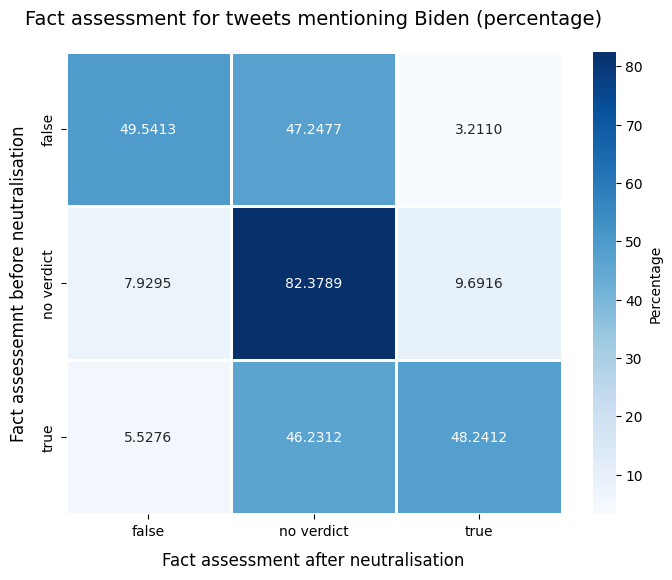

In [ ]:

table_normalized = table_normalized * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Blues", fmt=".4f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets mentioning Biden (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Fact assessemnt before neutralisation', fontsize=12, labelpad=10)

# displaying the plot
plt.show()


#### toxicity for Biden

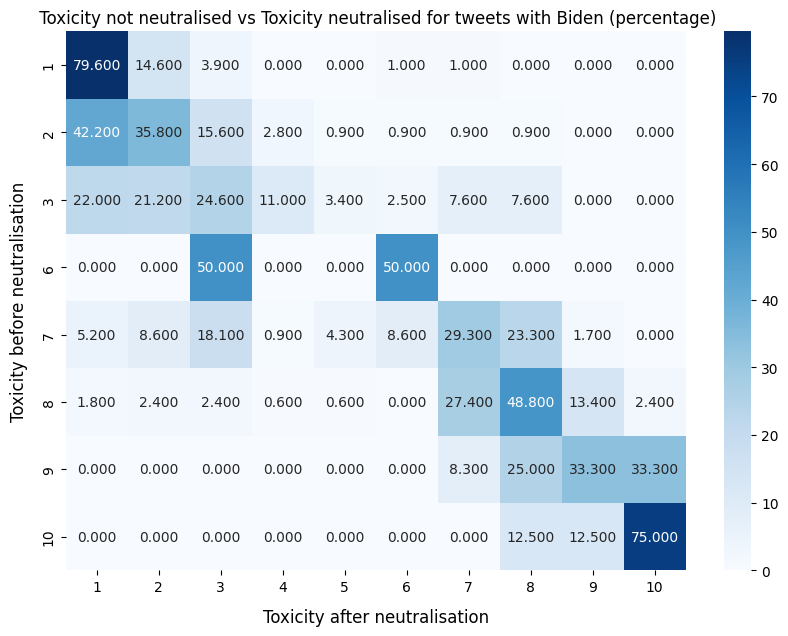

In [ ]:

table_toxicity = pd.crosstab(df_biden['Toxicity_not_neutral'], df_biden['Toxicity'])
table_toxicity = table_toxicity.sort_index()

row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
table_normalized_toxicity = table_normalized_toxicity.round(3) *100

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Blues", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity neutralised for tweets with Biden (percentage)")

# the position of the labels and ticks
plt.xlabel('Toxicity after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Toxicity before neutralisation', fontsize=12, labelpad=10)

plt.show()


## Trump subset

In [ ]:
df_trump = df[df['Trump initially'] == 1]


display(df_trump.head(5))

,Unnamed: 0,created_at_fuzzy,state_likely_tweeted_from,text,source,display_text_width,lang,favorite_count,retweet_count,is_quote,...,listed_count,statuses_count,favourites_count,Biden initially,Trump initially,Toxicity_not_neutral,Fact_assessment_not_neutral,Toxicity,Fact assessment,topic_label
0,0,2020-08-13T16:55:49Z,California,LIVE: presidential candidate holds press confe...,Twitter Web App,71,en,0,0,False,...,4,39349,23299,0,1,1,no verdict,1,no verdict,-1.0
1,1,2020-08-30T00:03:31Z,Tennessee,presidential candidate’s claim the ‘silent maj...,Twitter Web App,205,en,9,2,False,...,2,23786,30906,0,1,8,no verdict,8,no verdict,-1.0
8,8,2020-12-16T19:04:31Z,California,Doug Collins is in the Deep state Mitch McConn...,Twitter for Android,195,en,1,0,False,...,0,1245,1427,0,1,8,false,9,false,8.0
9,9,2020-07-29T13:51:59Z,Kansas,It was presidential candidate's antic semitic ...,Twitter for Android,69,en,0,0,True,...,0,115742,48100,0,1,8,false,7,true,-1.0
11,11,2020-12-25T11:32:41Z,Pennsylvania,"@PreetBharara I've always stood by *pled*, unt...",Twitter for Android,108,en,0,0,False,...,7,22893,18428,0,1,2,no verdict,1,no verdict,4.0


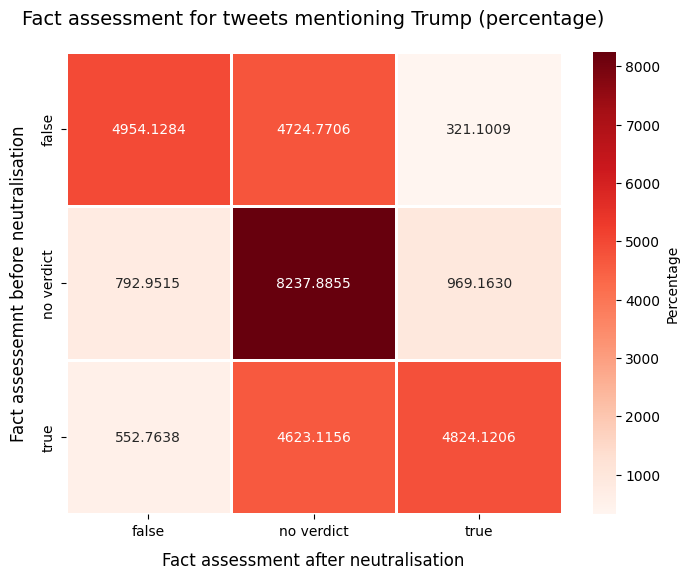

In [ ]:

table_normalized = table_normalized * 100 # changing to percentages for easier interpretation
plt.figure(figsize=(8, 6))

# plotting the heatmap 
ax = sns.heatmap(table_normalized, annot=True, cmap="Reds", fmt=".4f", cbar_kws={'label': 'Percentage'},linewidths=1, linecolor="white")

#title 
plt.title("Fact assessment for tweets mentioning Trump (percentage)", fontsize=14, pad=20)

# the position of the labels and ticks
plt.xlabel('Fact assessment after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Fact assessemnt before neutralisation', fontsize=12, labelpad=10)

# displaying the plot
plt.show()

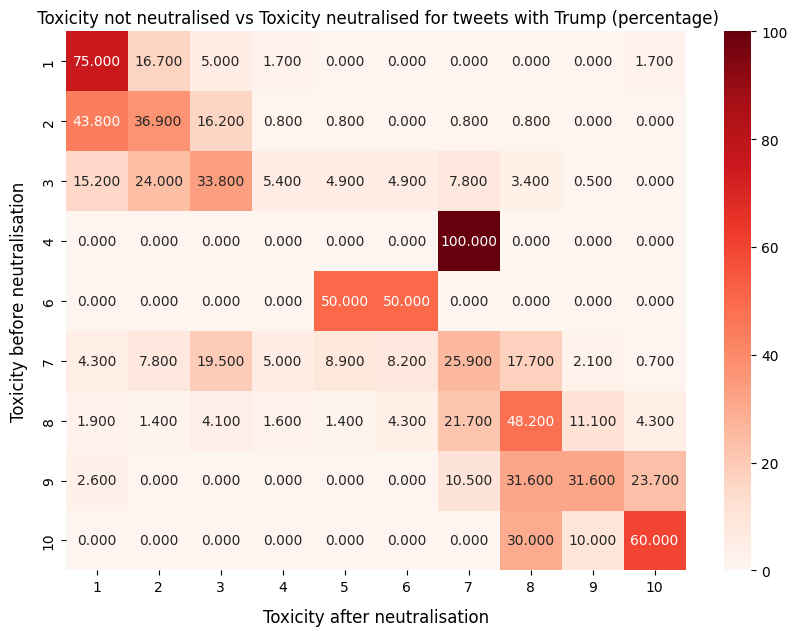

In [ ]:

table_toxicity = pd.crosstab(df_trump['Toxicity_not_neutral'], df_trump['Toxicity'])
table_toxicity = table_toxicity.sort_index()

row_sums_toxicity = table_toxicity.sum(axis=1)
table_normalized_toxicity = table_toxicity.div(row_sums_toxicity, axis=0)
table_normalized_toxicity = table_normalized_toxicity.round(3) *100

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(table_normalized_toxicity, annot=True, cmap="Reds", fmt=".3f")
plt.title(" Toxicity not neutralised vs Toxicity neutralised for tweets with Trump (percentage)")

# the position of the labels and ticks
plt.xlabel('Toxicity after neutralisation', fontsize=12, labelpad=10)
plt.ylabel('Toxicity before neutralisation', fontsize=12, labelpad=10)

plt.show()

# By the topic


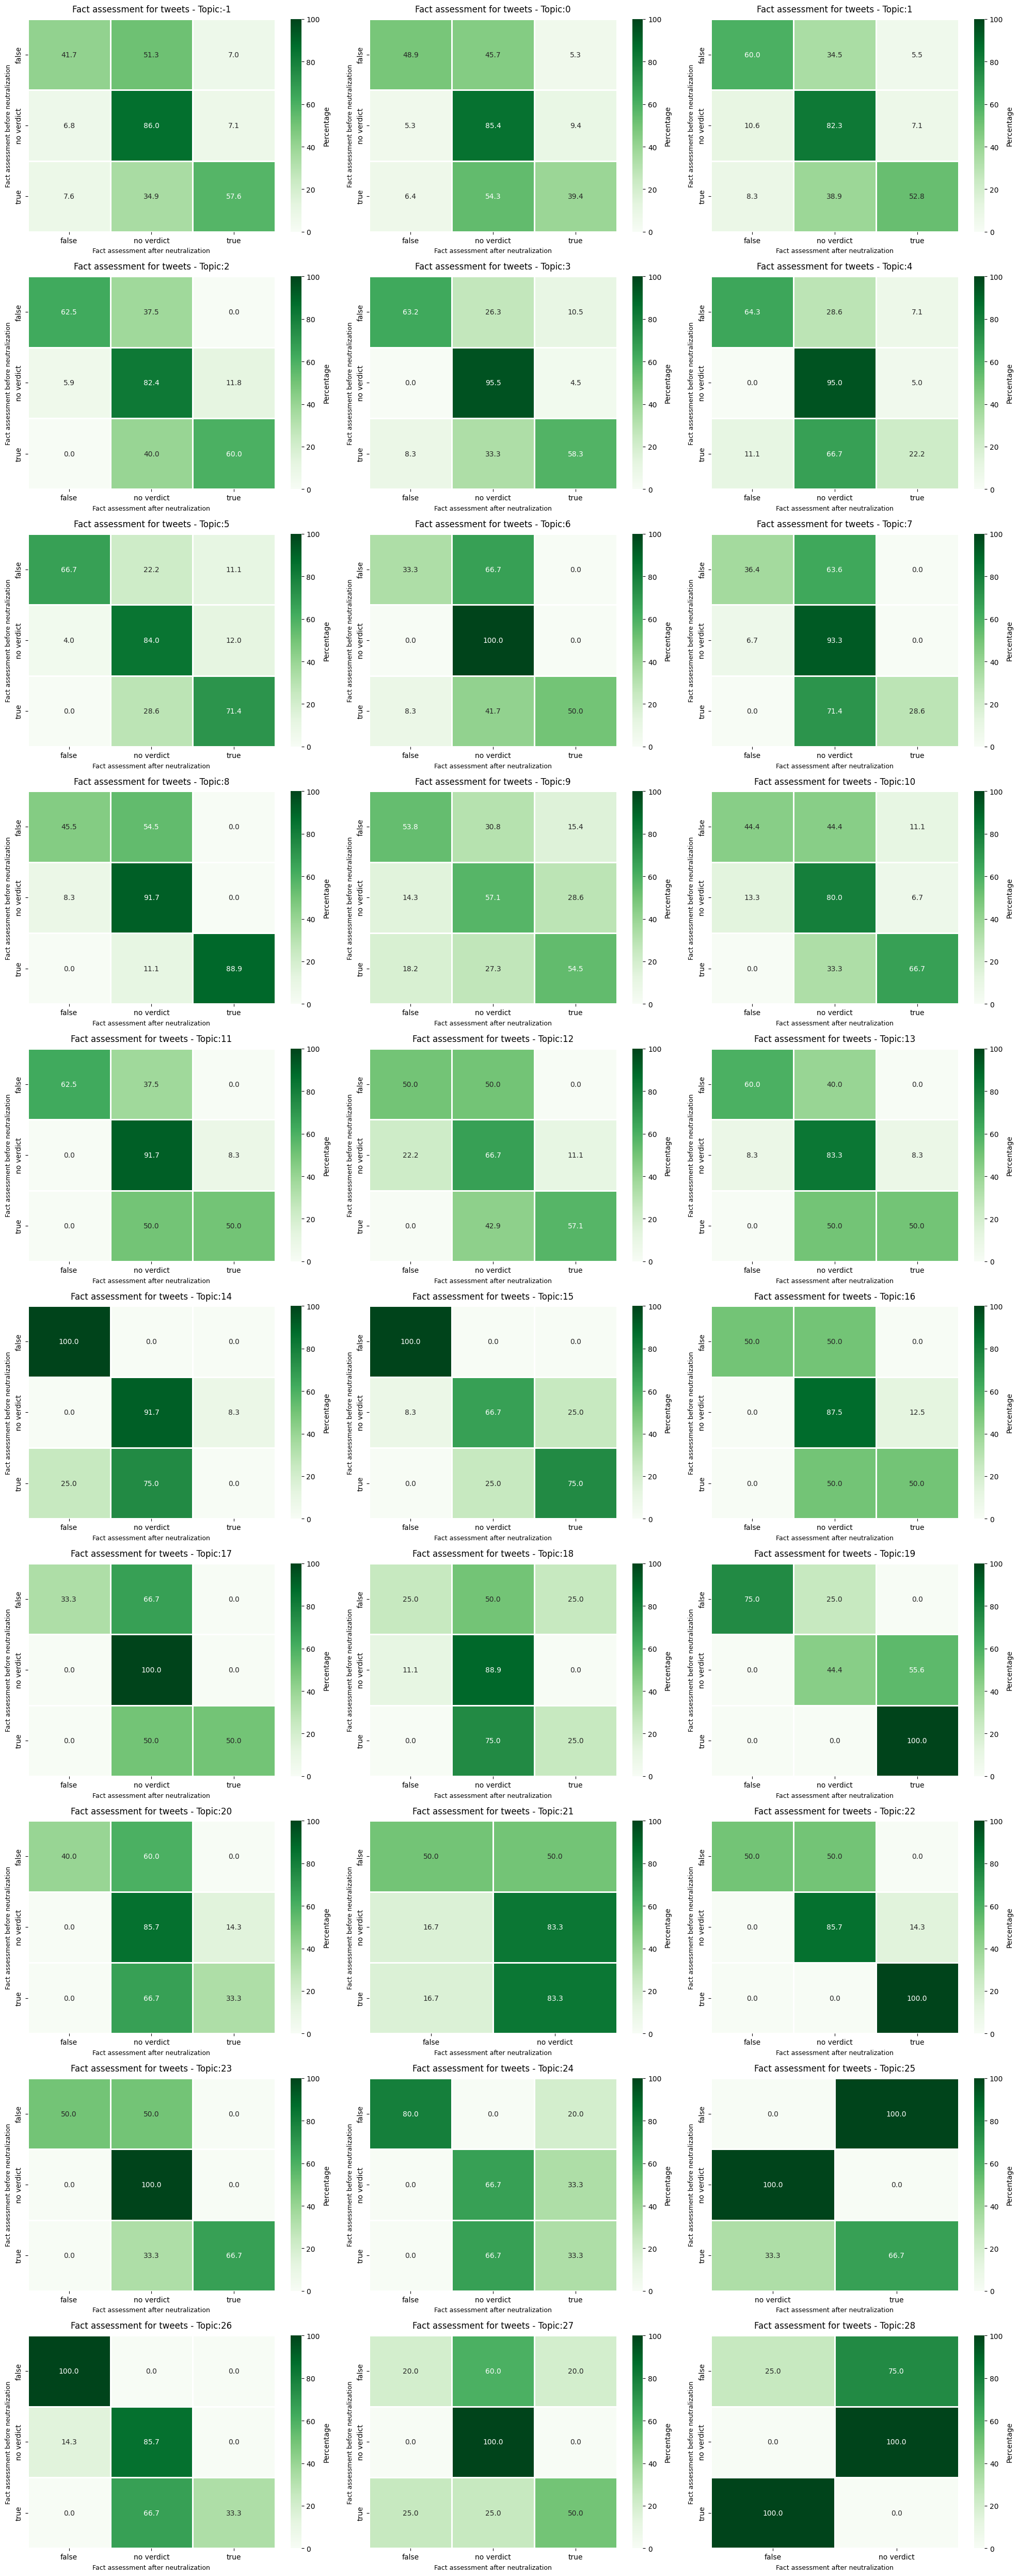

In [ ]:


df = df.dropna(subset=['topic_label'])
# Convert topic labels to integers
df['topic_label'] = df['topic_label'].astype(int)


# Get unique topic labels
topic_labels = df['topic_label'].unique()

# Dictionary to store the sum of normalized values for each topic
topic_sums = {}

# Calculate the sum of normalized values for each topic
for topic in topic_labels:
    topic_data = df[df['topic_label'] == topic]
    if not topic_data.empty:
        table = pd.crosstab(topic_data['Fact_assessment_not_neutral'], topic_data['Fact assessment'])
        if not table.empty:
            row_sums = table.sum(axis=1)
            table_normalized = table.div(row_sums, axis=0).round(3) * 100
            topic_sums[topic] = table_normalized.sum().sum()  # Sum of all normalized values for the topic

# Sort topics by the topic number
sorted_topics = sorted(topic_sums.keys())

# Find the global min and max values for the color scale
global_min = float('inf')
global_max = float('-inf')

for topic in sorted_topics:
    topic_data = df[df['topic_label'] == topic]
    if not topic_data.empty:
        table = pd.crosstab(topic_data['Fact_assessment_not_neutral'], topic_data['Fact assessment'])
        if not table.empty:
            row_sums = table.sum(axis=1)
            table_normalized = table.div(row_sums, axis=0).round(3) * 100
            global_min = min(global_min, table_normalized.min().min())
            global_max = max(global_max, table_normalized.max().max())

# Plot heatmaps for each sorted topic in a grid of 4 columns
num_columns = 3
num_rows = (len(sorted_topics) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))

# Flatten axes for easier indexing
axes = axes.flatten()

for idx, topic in enumerate(sorted_topics):
    # Filter the data for the current topic
    topic_data = df[df['topic_label'] == topic]
    
    if not topic_data.empty:
        # Create crosstab and normalize
        table = pd.crosstab(topic_data['Fact_assessment_not_neutral'], topic_data['Fact assessment'])
        if not table.empty:
            row_sums = table.sum(axis=1)
            table_normalized = table.div(row_sums, axis=0).round(3) * 100
            
            # Plot the heatmap with common color scale
            ax = sns.heatmap(table_normalized, annot=True, cmap="Greens", fmt=".1f", cbar_kws={'label': 'Percentage'}, linewidths=1, linecolor="white", ax=axes[idx], vmin=global_min, vmax=global_max)
            
            # Title
            ax.set_title(f"Fact assessment for tweets - Topic:{topic}", fontsize=12, pad=10)
            
            # Labels
            ax.set_xlabel('Fact assessment after neutralization', fontsize=9, labelpad=5)
            ax.set_ylabel('Fact assessment before neutralization', fontsize=9, labelpad=5)

# Remove unused axes
for ax in axes[len(sorted_topics):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()